In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("../dataset/adult.data.txt",
    names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],sep=r'\s*,\s*',na_values="?", engine='python')

In [5]:
dataset.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
#Find actual data count
datacount = dataset["Age"].value_counts()
print("datacount:\n", datacount)

datacount:
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


In [9]:
# Set parameters for Laplace function implementation
# l1 sensitivity = 1
# epsilon = 0.125
location = 0.0
scale = 1.0/0.125 

In [12]:
# Gets random laplacian noise for all values
Laplacian_noise = np.random.laplace(location, scale, len(datacount))
print("Laplacian_noise:\n", Laplacian_noise)

Laplacian_noise:
 [-4.34451607e+00  1.23193030e+00 -6.69799908e+00  6.78109858e+00
  4.27033533e-01 -3.81827890e+00  2.75429588e+00  1.16932318e+01
 -1.42028362e+01  1.31274679e+01  3.27861152e+01  2.48127391e+01
  2.44378918e+01 -8.83964601e+00  1.30775542e+01  6.07671603e+00
 -1.80451952e+01  2.93569982e+00 -3.24399749e+00 -6.55032340e+00
 -2.66949395e+00 -8.16058084e+00  3.74192035e+00 -1.73130803e+00
  1.86735004e+00  2.95007764e+00  4.18713159e+00 -2.24901642e+01
  9.92453327e+00  5.69270815e+00 -2.83191882e+00 -1.84598111e+01
 -6.89217675e-01 -1.27411476e+00 -3.13932901e-01  3.63220722e+00
  5.11774221e+00  3.48728835e-01  3.65621246e-01  3.08518446e+00
 -6.63560288e+00 -8.89611305e+00  2.49716685e+00 -2.84819638e+00
  1.47669642e+01  1.89313877e+00  1.45448023e+00  1.26145558e+01
 -4.67615079e+00  7.18011637e-01 -3.37925627e+00  4.52504095e+00
  1.26022371e-02  9.04841855e+00  1.27700344e+01  2.86417050e+00
 -4.63860404e+00  6.78845476e+00  5.12950188e+00 -9.25323845e+00
  3.671

In [13]:
# Add random noise generated from Laplace function to actual count
noisydata = datacount + Laplacian_noise
print("noisydata:\n", noisydata)

noisydata:
 36    893.655484
31    889.231930
34    879.302001
23    883.781099
35    876.427034
         ...    
83      5.446892
85     -0.502477
88      3.649544
86    -40.518047
87     14.759098
Name: Age, Length: 73, dtype: float64


In [14]:
# Get index of datacount, "age"
index=list(datacount.index)
# Transfer type of Laplace Noise from 'numpy.ndarray' to 'pandas.core.series.Series' and index
laplacenoise=pd.Series(Laplacian_noise,index=index)

<AxesSubplot:title={'center':'Laplace noisydata histogram'}>

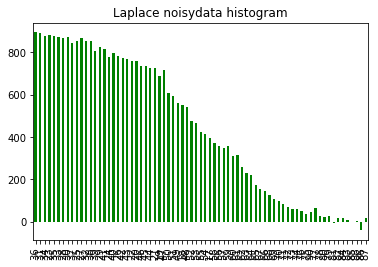

In [15]:
# Generate noisydata histogram
plt.figure("Figure 1: Laplace noisydata histogram")
plt.title("Laplace noisydata histogram")
noisydata.plot(kind="bar",color = 'g')

[]

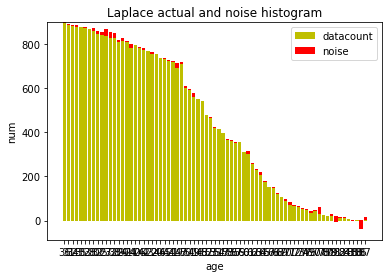

In [16]:
# Generate actual and noise histogram
plt.figure("Figure 2: Laplace actual and noise histogram")
plt.ylabel("num")
plt.xlabel("age")
plt.bar(range(len(noisydata)),datacount,label='datacount',fc='y')
plt.bar(range(len(noisydata)),laplacenoise,bottom=datacount,label='noise',tick_label=index,fc='r')
plt.title("Laplace actual and noise histogram")
plt.legend()
plt.plot()